<a href="https://colab.research.google.com/github/yusufghifari29/Pemrograman_Python/blob/main/Tugas%20Akhir_Yusuf%20Ghifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/DATASET TUGAS AKHIR

/content/drive/MyDrive/Colab Notebooks/DATASET TUGAS AKHIR


In [3]:
ls

'Adam SoftMax 128 Pix BS 20 1E-2'/  'SGD SoftMax 128 Pix BS 20 1E-2'/
'Adam SoftMax 128 Pix BS 20 1E-3'/  'SGD SoftMax 128 Pix BS 20 1E-3'/
'Adam SoftMax 128 Pix BS 20 1E-4'/  'SGD SoftMax 128 Pix BS 20 1E-4'/
'Adam SoftMax 128 Pix BS 30 1E-2'/  'SGD SoftMax 128 Pix BS 30 1E-2'/
'Adam SoftMax 128 Pix BS 30 1E-3'/  'SGD SoftMax 128 Pix BS 30 1E-3'/
'Adam SoftMax 128 Pix BS 30 1E-4'/  'SGD SoftMax 128 Pix BS 30 1E-4'/
'Adam SoftMax 128 Pix BS 40 1E-2'/  'SGD SoftMax 128 Pix BS 40 1E-2'/
'Adam SoftMax 128 Pix BS 40 1E-3'/  'SGD SoftMax 128 Pix BS 40 1E-3'/
'Adam SoftMax 128 Pix BS 40 1E-4'/  'SGD SoftMax 128 Pix BS 40 1E-4'/
'Adam SoftMax 224 Pix BS 20 1E-2'/  'SGD SoftMax 224 Pix BS 20 1E-2'/
'Adam SoftMax 224 Pix BS 20 1E-3'/  'SGD SoftMax 224 Pix BS 20 1E-3'/
'Adam SoftMax 224 Pix BS 20 1E-4'/  'SGD SoftMax 224 Pix BS 20 1E-4'/
'Adam SoftMax 224 Pix BS 30 1E-2'/  'SGD SoftMax 224 Pix BS 30 1E-2'/
'Adam SoftMax 224 Pix BS 30 1E-3'/  'SGD SoftMax 224 Pix BS 30 1E-3'/
'Adam SoftMax 224 Pi

In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import seaborn as sns
from sklearn import metrics

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images('Train')
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((224, 224))) / 255.0 #normalisasi
	data.append(image)
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon', 'Adenocarcinomas Colon',

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
int_enc = le.fit_transform(labels)
print(int_enc)

[0 0 0 ... 1 1 1]


In [9]:
onehot_encoder = OneHotEncoder(sparse=False)
int_enc = int_enc.reshape(len(int_enc),1)
onehot_encoded = onehot_encoder.fit_transform(int_enc)
print(onehot_encoded)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
(trainX, valX, trainY, valY) = train_test_split(np.array(data),	np.array(onehot_encoded), test_size=0.2, shuffle=True)
(trainX, testX, trainY, testY) = train_test_split(trainX, trainY, test_size=0.1, shuffle=True)
print(trainX.shape)
print(testX.shape)
print(valX.shape)
print(trainY.shape)
print(testY.shape)
print(valY.shape)
#The first split creates 80% training + validation and 20% validation. 
#The second split starts with the 80% training dan split ke 10 % menjadi 70 % Training
#70% training, 20 % Validation dan 10 % Testing

(1440, 224, 224, 3)
(160, 224, 224, 3)
(400, 224, 224, 3)
(1440, 2)
(160, 2)
(400, 2)


In [11]:
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

In [12]:
es = EarlyStopping(monitor='val_loss', patience=5, mode='auto',restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5', monitor='val_loss', verbose=1,save_best_only=True, mode='auto')


In [13]:
print("[INFO] training network...")
opt = Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [14]:
H = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=25, batch_size=20, shuffle=True)

Epoch 1/25
72/72 [==============================] - 23s 142ms/step - loss: 0.6046 - accuracy: 0.7250 - val_loss: 0.2345 - val_accuracy: 0.9350
Epoch 2/25
72/72 [==============================] - 9s 123ms/step - loss: 0.1857 - accuracy: 0.9312 - val_loss: 0.0397 - val_accuracy: 0.9975
Epoch 3/25
72/72 [==============================] - 9s 126ms/step - loss: 0.0960 - accuracy: 0.9674 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 4/25
72/72 [==============================] - 9s 126ms/step - loss: 0.0723 - accuracy: 0.9750 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/25
72/72 [==============================] - 9s 128ms/step - loss: 0.0710 - accuracy: 0.9688 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/25
72/72 [==============================] - 9s 128ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 7/25
72/72 [==============================] - 9s 130ms/step - loss: 0.0435 - accuracy: 0.9847 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


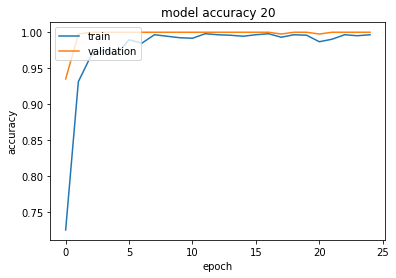

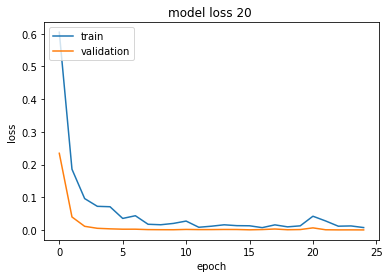

In [15]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy 20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss 20 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
print("evaluate on test data")
R = model.evaluate(testX, testY, batch_size=40)
print(R)

evaluate on test data
4/4 [==============================] - 1s 51ms/step - loss: 5.6945e-05 - accuracy: 1.0000
[5.694543870049529e-05, 1.0]


In [17]:
predictions = model.predict(testX, batch_size=40)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))

4/4 [==============================] - 1s 34ms/step
                       precision    recall  f1-score   support

Adenocarcinomas Colon       1.00      1.00      1.00        82
               Polyps       1.00      1.00      1.00        78

             accuracy                           1.00       160
            macro avg       1.00      1.00      1.00       160
         weighted avg       1.00      1.00      1.00       160



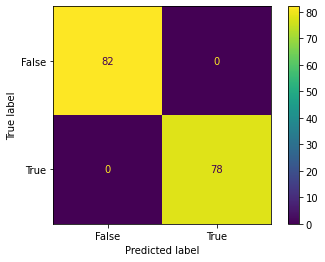

In [18]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.argmax(predictions,axis = 1)
predicted = numpy.argmax(testY,axis = 1)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/Colab Notebooks/DATASET TUGAS AKHIR/Train/Adenocarcinomas Colon/colonca999.jpeg'

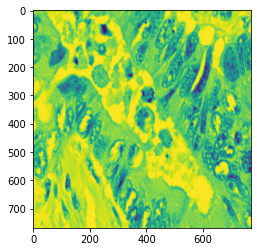

In [20]:
img_array = cv.imread(image1)
rgb = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
plt.imshow(rgb)
plt.show()
# print(type(img_array))

In [21]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/DATASET TUGAS AKHIR/Train/Adenocarcinomas Colon/colonca999.jpeg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [22]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [23]:
output = model.predict(image_testing, 1)
print(output)
print(le.classes_[output.argmax(axis=1)])

1/1 [==============================] - 1s 616ms/step
[[0.99872357 0.00104968]]
['Adenocarcinomas Colon']
